In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load all files

In [3]:
files = [i for i in glob.glob('/content/drive/MyDrive/INST 737/Youtube_data/*.{}'.format('csv'))]
sorted(files)

['/content/drive/MyDrive/INST 737/Youtube_data/CAvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/DEvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/FRvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/GBvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/INvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/JPvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/KRvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/MXvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/RUvideos.csv',
 '/content/drive/MyDrive/INST 737/Youtube_data/USvideos.csv']

In [4]:
dfs = []
for csv in files:
    df = pd.read_csv(csv, index_col=0)
    dfs.append(df)

df_all = pd.concat(dfs)
print(len(df_all))


750145


In [5]:
df_all.head()

,Unnamed: 0.1,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,description,country.1
0,0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24.0,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786.0,35885.0,230.0,1539.0,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,DE,Heute gibt es mal wieder ein neues Format... w...,DE
1,1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23.0,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196.0,53576.0,302.0,1278.0,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,DE,Kinder ferngesteuert! Kinder lassen sich sooo ...,DE
2,2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24.0,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97190.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,DE,"One year after the presidential election, John...",DE
3,3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27.0,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247.0,31821.0,458.0,1955.0,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,DE,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,DE
4,4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24.0,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213.0,100684.0,2467.0,10244.0,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,DE,18 Song Mashup über den (veränderten) Beat von...,DE


In [6]:
df_all.drop(["Unnamed: 0.1","country.1"], axis=1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24.0,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786.0,35885.0,230.0,1539.0,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,DE,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23.0,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196.0,53576.0,302.0,1278.0,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,DE,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24.0,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97190.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,DE,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27.0,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247.0,31821.0,458.0,1955.0,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,DE,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24.0,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213.0,100684.0,2467.0,10244.0,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,DE,18 Song Mashup über den (veränderten) Beat von...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40897,OMmR9THjVKM,18.14.06,ÃÂ£ ÃÂ¼ÃÂµÃÂ½ÃÂ ÃÂ¡ÃÂÃÂÃÂ! (Story...,Pastime Time,22.0,2018-06-13T13:47:01.000Z,story booth ÃÂ½ÃÂ° ÃÂÃÂÃÂÃÂÃÂºÃÂ¾Ã...,129488.0,5893.0,164.0,990.0,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,RU,ÃÂÃÂ¾ÃÂÃÂ¸ÃÂºÃÂ¸ ÃÂ² Blade and Soul -...
40898,tX7p7NtNVDE,18.14.06,ÃÂÃÂ¾ÃÂ¸ ÃÂÃÂµÃÂÃÂÃÂºÃÂ¸ÃÂµ ÃÂ¢...,CaGArt,23.0,2018-06-12T09:38:38.000Z,"ÃÂºÃÂ°ÃÂ³ÃÂ°ÃÂÃÂ|""ÃÂºÃÂ°ÃÂ³ÃÂ¸""|""Ã...",99163.0,4659.0,337.0,692.0,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,RU,ÃÂÃÂ¾ÃÂ¸ ÃÂÃÂµÃÂÃÂÃÂºÃÂ¸ÃÂµ ÃÂ¢...
40899,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24.0,2018-06-13T12:51:23.000Z,[none],449611.0,24808.0,93.0,974.0,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,RU,***I do NOT own anything. Just want to share t...
40900,4PiSLIrsSiY,18.14.06,ÃÂÃÂÃÂÃÂÃÂ ÃÂÃÂÃÂÃÂÃÂÃÂ ...,ÃÂÃÂÃÂÃÂÃÂ° ÃÂÃÂµÃÂ±ÃÂµÃÂ´ÃÂµÃ...,22.0,2018-06-13T00:23:33.000Z,ÃÂÃÂÃÂ¼ ÃÂÃÂÃÂ ÃÂ²ÃÂ°ÃÂ½ÃÂ½ÃÂ¾...,14225.0,793.0,39.0,209.0,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,RU,ÃÂÃÂ±ÃÂ·ÃÂ¾ÃÂ ÃÂ²ÃÂ°ÃÂ½ÃÂ½ÃÂ¾ÃÂ¹ ...


In [7]:
df_all.shape

(750145, 19)

In [8]:
df_all['trending_date'] = pd.to_datetime(df_all['trending_date'],errors='coerce', format='%y.%d.%m')
df_all['publish_time'] = pd.to_datetime(df_all['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

df_all = df_all[df_all['trending_date'].notnull()]
df_all = df_all[df_all['publish_time'].notnull()]

df_all = df_all.dropna(how='any',inplace=False, axis = 0)

In [9]:
len(df_all)

355760

In [10]:
df_all.insert(4, 'publish_date', df_all['publish_time'].dt.date)
df_all['publish_time'] = df_all['publish_time'].dt.time

In [11]:
df_all.head()

,Unnamed: 0.1,video_id,trending_date,title,publish_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,description,country.1
0,0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,2017-11-13,inscope21,24.0,17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786.0,35885.0,230.0,1539.0,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,DE,Heute gibt es mal wieder ein neues Format... w...,DE
1,1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,2017-11-12,LUKE! Die Woche und ich,23.0,22:30:01,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196.0,53576.0,302.0,1278.0,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,DE,Kinder ferngesteuert! Kinder lassen sich sooo ...,DE
2,2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,2017-11-13,LastWeekTonight,24.0,07:30:00,"last week tonight trump presidency|""last week ...",2418783.0,97190.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,DE,"One year after the presidential election, John...",DE
3,3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,2017-11-12,100SekundenPhysik,27.0,15:00:01,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247.0,31821.0,458.0,1955.0,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,DE,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,DE
4,4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),2017-11-12,rezo,24.0,13:10:36,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213.0,100684.0,2467.0,10244.0,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,DE,18 Song Mashup über den (veränderten) Beat von...,DE


In [12]:
#df_uniq (only keep the last entry if duplicated because it carries latest stat)
#df_all (full set of combined data)

df_all = df_all.sort_values('trending_date')

In [13]:
df_all.tail()

,Unnamed: 0.1,video_id,trending_date,title,publish_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,description,country.1
40822,40692,PyCgn2Jiv3g,2018-06-14,Parents mode d'emploi - Episode du mardi 12 ju...,2018-06-13,Parents mode d'emploi,24.0,08:42:37,"parents|""mode d'emploi""|""PMDE""|""france 2""|""ser...",29211.0,1168.0,12.0,34.0,https://i.ytimg.com/vi/PyCgn2Jiv3g/default.jpg,False,False,False,FR,Retrouvez toutes les vidéos de Parents mode d'...,FR
40823,40693,VwsZjVDUWsg,2018-06-14,MON SETUP TV 4K POUR LA COUPE DU MONDE !,2018-06-13,STEVEN,28.0,16:15:01,"TV|""Loewe""|""55""|""pouce""|""OLED""|""4K""|""HDR""|""set...",31279.0,2456.0,113.0,322.0,https://i.ytimg.com/vi/VwsZjVDUWsg/default.jpg,False,False,False,FR,➜ TV 4K Loewe : https://www.loewe.tv/fr/bild/l...,FR
40824,40694,H7dr8XFgmlM,2018-06-14,Le Ramadan de ASS 2018 - épisode 24 : sama yaay,2018-06-13,AFRICAFILMStv,1.0,19:00:01,"le ramadan de ass 2018 épisode 24 sama yaay|""a...",40611.0,1320.0,26.0,154.0,https://i.ytimg.com/vi/H7dr8XFgmlM/default.jpg,False,False,False,FR,# Abonnez-vous à AFRICAFILMStv ici https://goo...,FR
40749,40619,NmKheyy3E7U,2018-06-14,PARIS SPORTIFS : ILS GAGNENT DE L'ARGENT SUR V...,2018-06-13,Ahmed Lndy,17.0,15:00:04,"coupe du monde 2018|""mondial""|""paris sportif""|...",31371.0,3273.0,119.0,654.0,https://i.ytimg.com/vi/NmKheyy3E7U/default.jpg,False,False,False,FR,"Pronostiqueurs, pronos, pronostics sportifs, b...",FR
40901,40738,Ehy5foVfKOE,2018-06-14,ÃÂÃÂ»ÃÂ¾ÃÂ ÃÂ¾ÃÂ¹ ÃÂÃÂ¸ÃÂ³ÃÂ½ÃÂ°Ã...,2018-06-13,Tubus Show,29.0,09:50:09,ÃÂ¿ÃÂ»ÃÂ¾ÃÂ ÃÂ¾ÃÂ¹ ÃÂÃÂ¸ÃÂ³ÃÂ½ÃÂ°Ã...,52340.0,7708.0,133.0,1819.0,https://i.ytimg.com/vi/Ehy5foVfKOE/default.jpg,False,False,False,RU,ÃÂ 90-ÃÂ ÃÂ³ÃÂ¾ÃÂ´ÃÂ°ÃÂ ÃÂ¿ÃÂÃÂ¾...,RU


In [14]:
df_uniq = df_all.sort_values('trending_date').drop_duplicates('video_id',keep='last')

In [15]:
len(df_all)

355760

In [16]:
len(df_uniq)

170917

In [17]:
df_all.head()

,Unnamed: 0.1,video_id,trending_date,title,publish_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,description,country.1
0,0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,2017-11-13,inscope21,24.0,17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786.0,35885.0,230.0,1539.0,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,DE,Heute gibt es mal wieder ein neues Format... w...,DE
122,122,6PLQ5kuE1L4,2017-11-14,ÃÂ¡ÃÂ°ÃÂ¼ÃÂ¾ÃÂµ ÃÂºÃÂÃÂÃÂ¿ÃÂ½ÃÂ¾Ã...,2017-11-13,ÃÂÃÂ¸ÃÂº ÃÂÃÂ±ÃÂ·ÃÂ¾ÃÂ,28.0,15:14:10,"ÃÂºÃÂ¸ÃÂº|""ÃÂ¾ÃÂ±ÃÂ·ÃÂ¾ÃÂ""|""kik""|""obz...",112171.0,7662.0,182.0,317.0,https://i.ytimg.com/vi/6PLQ5kuE1L4/default.jpg,False,False,False,RU,ÃÂ¡ÃÂºÃÂ¸ÃÂ´ÃÂºÃÂ° 15% ÃÂ½ÃÂ° ÃÂÃÂ...,RU
123,123,JcO83xX3x2A,2017-11-14,ÃÂÃÂÃÂ ÃÂ¾ ÃÂ³ÃÂ¸ÃÂ³ÃÂ°ÃÂ½ÃÂÃÂ°...,2017-11-13,ÃÂÃÂ²ÃÂµÃÂ·ÃÂ´ÃÂ½ÃÂÃÂ¹ ÃÂÃÂ°ÃÂ¿Ã...,24.0,07:00:00,"ÃÂÃÂ¾ÃÂ½ÃÂ³|""ÃÂ·ÃÂ²ÃÂµÃÂ·ÃÂ´ÃÂ½ÃÂ...",119602.0,7469.0,96.0,434.0,https://i.ytimg.com/vi/JcO83xX3x2A/default.jpg,False,False,False,RU,ÃÂ-ÃÂºÃÂ°ÃÂÃÂ°ÃÂ»ÃÂ¾ÃÂ³. ÃÂ¡ÃÂÃÂ...,RU
124,124,#NAME?,2017-11-14,HextraCoin Ã¢ÂÂ ÃÂ¸ÃÂ½ÃÂ²ÃÂµÃÂÃÂÃÂ¸...,2017-11-13,ÃÂÃÂÃÂ¸ÃÂ¿ÃÂÃÂ¾ÃÂÃÂ¸ÃÂ ÃÂ¾ÃÂÃ...,27.0,15:37:05,"hextracoin|""hextra coin""|""hextracoin lending""|...",4606.0,178.0,3.0,20.0,https://i.ytimg.com/vi/-WusEl400qw/default.jpg,False,False,False,RU,Ã°ÂÂÂ ÃÂ¡ÃÂÃÂÃÂ»ÃÂºÃÂ° ÃÂ´ÃÂ»ÃÂ...,RU
125,125,23UX-S7ou1k,2017-11-14,ÃÂÃÂÃÂÃÂÃ°ÂÂÂ ÃÂÃÂÃÂÃÂ«ÃÂ ...,2017-11-13,TIP TOP TV,22.0,09:57:27,"ÃÂ¸ÃÂºÃÂµÃÂ°|""ÃÂÃÂ¸ÃÂ¿ ÃÂÃÂ¾ÃÂ¿ Ã...",14622.0,503.0,36.0,64.0,https://i.ytimg.com/vi/23UX-S7ou1k/default.jpg,False,False,False,RU,ÃÂÃÂÃÂÃÂÃ°ÂÂÂ ÃÂÃÂÃÂÃÂ«ÃÂ ...,RU


In [18]:
df_uniq.head()

,Unnamed: 0.1,video_id,trending_date,title,publish_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,description,country.1
154,154,v3nuxG2Q6Ew,2017-11-14,Sanjay Leela Bhansali Speaks | Padmavati | Ran...,2017-11-08,Viacom18 Motion Pictures,24.0,15:06:03,"Viacom18|""Viacom 18 Movies""|""Viacom 18 Motion ...",662980.0,18875.0,2323.0,3995.0,https://i.ytimg.com/vi/v3nuxG2Q6Ew/default.jpg,False,False,False,IN,"This is my tribute to the sacrifice, valour an...",IN
151,151,82Xuew50Dh4,2017-11-14,'Shaadi Mein Zaroor Aana' Star Cast Rajkummar ...,2017-11-11,zoom,24.0,14:00:00,"Rajkummar Rao|""Kriti Kharbanda""|""Shaadi Mein Z...",55908.0,452.0,18.0,30.0,https://i.ytimg.com/vi/82Xuew50Dh4/default.jpg,False,False,False,IN,Tanishk Bagchi & Siddharth Mahadevan On Yaar M...,IN
149,149,t_vpgs7aDco,2017-11-14,Real Fight Between Hero Rajendra Prasad and Vi...,2017-11-13,Tollywood Mirapakai,24.0,04:45:33,Real Fight Between Hero Rajendra Prasad and Vi...,19567.0,171.0,28.0,204.0,https://i.ytimg.com/vi/t_vpgs7aDco/default.jpg,False,False,False,IN,Real Fight Between Hero Rajendra Prasad and Vi...,IN
146,146,Yx6FaFVw9NY,2017-11-14,Daily Promise and Prayer by Bro. P. Satish Kum...,2017-11-12,Calvary Temple Hyderabad,22.0,19:00:01,"calvary temple|""shalom""|""shalom calvary temple...",15107.0,1090.0,6.0,133.0,https://i.ytimg.com/vi/Yx6FaFVw9NY/default.jpg,False,False,False,IN,Calvary Temple - Biggest & Fastest Growing Chu...,IN
156,156,ziOwvxFoLw0,2017-11-14,CLOSE ENCOUNTER WITH MAJOR RAVI _Reporter Live,2017-11-11,REPORTER LIVE,25.0,14:26:20,"Reporter live|""Malayalam News""|""News Live tv""|...",92089.0,895.0,137.0,533.0,https://i.ytimg.com/vi/ziOwvxFoLw0/default.jpg,False,False,False,IN,#Reporter Live #Editor's hour\n\nSubscribe Ou...,IN


In [19]:
df_uniq.category_id.head()

154    24.0
151    24.0
149    24.0
146    22.0
156    25.0
Name: category_id, dtype: object

In [20]:
df_uniq['category_id'] = df_uniq['category_id'].astype(int).astype(str)
df_uniq['category_id'].str.replace('.0', ' ')
df_all['category_id'] = df_all['category_id'].astype(int).astype(str)
df_all['category_id'].str.replace('.0', ' ')

0        24
122      28
123      24
124      27
125      22
         ..
40822    24
40823    28
40824     1
40749    17
40901    29
Name: category_id, Length: 355760, dtype: object

In [21]:
# creates a dictionary that maps `category_id` to `category`
category_id = {}

with open('/content/drive/MyDrive/INST 737/Youtube_data/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']
category_id

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [22]:
df_uniq.insert(4, 'category', df_uniq['category_id'].map(category_id))
df_all.insert(4, 'category', df_all['category_id'].map(category_id))

In [23]:
df_uniq[['category_id', 'category']].tail()

,category_id,category
41115,22,People & Blogs
41114,24,Entertainment
41112,43,Shows
41288,10,Music
40901,29,Nonprofits & Activism


In [24]:
category_list = df_all['category'].unique()
category_list

array(['Entertainment', 'Science & Technology', 'Education',
       'People & Blogs', 'Pets & Animals', 'Autos & Vehicles',
       'Nonprofits & Activism', 'Film & Animation', 'News & Politics',
       'Music', 'Travel & Events', 'Gaming', 'Howto & Style', 'Sports',
       'Comedy', 'Shows', 'Movies', 'Trailers'], dtype=object)

In [25]:
df_all.country.unique()

array(['DE', 'RU', 'MX', 'US', 'KR', 'IN', 'CA', 'FR', 'GB', 'JP'],
      dtype=object)

In [26]:
df_all.head()

,Unnamed: 0.1,video_id,trending_date,title,category,publish_date,channel_title,category_id,publish_time,tags,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,description,country.1
0,0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,Entertainment,2017-11-13,inscope21,24,17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",...,35885.0,230.0,1539.0,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,DE,Heute gibt es mal wieder ein neues Format... w...,DE
122,122,6PLQ5kuE1L4,2017-11-14,ÃÂ¡ÃÂ°ÃÂ¼ÃÂ¾ÃÂµ ÃÂºÃÂÃÂÃÂ¿ÃÂ½ÃÂ¾Ã...,Science & Technology,2017-11-13,ÃÂÃÂ¸ÃÂº ÃÂÃÂ±ÃÂ·ÃÂ¾ÃÂ,28,15:14:10,"ÃÂºÃÂ¸ÃÂº|""ÃÂ¾ÃÂ±ÃÂ·ÃÂ¾ÃÂ""|""kik""|""obz...",...,7662.0,182.0,317.0,https://i.ytimg.com/vi/6PLQ5kuE1L4/default.jpg,False,False,False,RU,ÃÂ¡ÃÂºÃÂ¸ÃÂ´ÃÂºÃÂ° 15% ÃÂ½ÃÂ° ÃÂÃÂ...,RU
123,123,JcO83xX3x2A,2017-11-14,ÃÂÃÂÃÂ ÃÂ¾ ÃÂ³ÃÂ¸ÃÂ³ÃÂ°ÃÂ½ÃÂÃÂ°...,Entertainment,2017-11-13,ÃÂÃÂ²ÃÂµÃÂ·ÃÂ´ÃÂ½ÃÂÃÂ¹ ÃÂÃÂ°ÃÂ¿Ã...,24,07:00:00,"ÃÂÃÂ¾ÃÂ½ÃÂ³|""ÃÂ·ÃÂ²ÃÂµÃÂ·ÃÂ´ÃÂ½ÃÂ...",...,7469.0,96.0,434.0,https://i.ytimg.com/vi/JcO83xX3x2A/default.jpg,False,False,False,RU,ÃÂ-ÃÂºÃÂ°ÃÂÃÂ°ÃÂ»ÃÂ¾ÃÂ³. ÃÂ¡ÃÂÃÂ...,RU
124,124,#NAME?,2017-11-14,HextraCoin Ã¢ÂÂ ÃÂ¸ÃÂ½ÃÂ²ÃÂµÃÂÃÂÃÂ¸...,Education,2017-11-13,ÃÂÃÂÃÂ¸ÃÂ¿ÃÂÃÂ¾ÃÂÃÂ¸ÃÂ ÃÂ¾ÃÂÃ...,27,15:37:05,"hextracoin|""hextra coin""|""hextracoin lending""|...",...,178.0,3.0,20.0,https://i.ytimg.com/vi/-WusEl400qw/default.jpg,False,False,False,RU,Ã°ÂÂÂ ÃÂ¡ÃÂÃÂÃÂ»ÃÂºÃÂ° ÃÂ´ÃÂ»ÃÂ...,RU
125,125,23UX-S7ou1k,2017-11-14,ÃÂÃÂÃÂÃÂÃ°ÂÂÂ ÃÂÃÂÃÂÃÂ«ÃÂ ...,People & Blogs,2017-11-13,TIP TOP TV,22,09:57:27,"ÃÂ¸ÃÂºÃÂµÃÂ°|""ÃÂÃÂ¸ÃÂ¿ ÃÂÃÂ¾ÃÂ¿ Ã...",...,503.0,36.0,64.0,https://i.ytimg.com/vi/23UX-S7ou1k/default.jpg,False,False,False,RU,ÃÂÃÂÃÂÃÂÃ°ÂÂÂ ÃÂÃÂÃÂÃÂ«ÃÂ ...,RU


In [27]:
df_all.loc[df_all['video_id']=='#NAME?']


,Unnamed: 0.1,video_id,trending_date,title,category,publish_date,channel_title,category_id,publish_time,tags,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,description,country.1
124,124,#NAME?,2017-11-14,HextraCoin Ã¢ÂÂ ÃÂ¸ÃÂ½ÃÂ²ÃÂµÃÂÃÂÃÂ¸...,Education,2017-11-13,ÃÂÃÂÃÂ¸ÃÂ¿ÃÂÃÂ¾ÃÂÃÂ¸ÃÂ ÃÂ¾ÃÂÃ...,27,15:37:05,"hextracoin|""hextra coin""|""hextracoin lending""|...",...,178.0,3.0,20.0,https://i.ytimg.com/vi/-WusEl400qw/default.jpg,False,False,False,RU,Ã°ÂÂÂ ÃÂ¡ÃÂÃÂÃÂ»ÃÂºÃÂ° ÃÂ´ÃÂ»ÃÂ...,RU
82,82,#NAME?,2017-11-14,ÃÂÃÂ¾ÃÂ²ÃÂ¸ÃÂ½ÃÂºÃÂ¸ ÃÂ¸ÃÂ½ÃÂÃÂµÃ...,People & Blogs,2017-11-13,Fismart,22,14:24:45,ÃÂÃÂ½ÃÂÃÂµÃÂÃÂ½ÃÂµÃÂ ÃÂ¼ÃÂ°ÃÂ³Ã...,...,114.0,1.0,11.0,https://i.ytimg.com/vi/-iV6L-iz-GY/default.jpg,False,False,False,RU,ÃÂÃÂ¾ÃÂÃÂ¾ÃÂ³ÃÂ¸ÃÂµ ÃÂ´ÃÂÃÂÃÂ·Ã...,RU
45,45,#NAME?,2017-11-14,Ã¬ÂÂ Ã¬ÂÂÃ­ÂÂÃ¬ÂÂ Ã¬ÂÂÃ«Â°Â©Ã¬ÂÂ¡ 11...,News & Politics,2017-11-13,Ã¬ÂÂ Ã¬ÂÂÃ­ÂÂÃ¬ÂÂ,25,09:30:56,[none],...,1427.0,127.0,201.0,https://i.ytimg.com/vi/-G0rp0wTOFM/default.jpg,False,False,False,KR,(Ã¬Â£Â¼)Ã«Â¯Â¼Ã¬Â´Â Ã¬Â»Â¤Ã«Â®Â¤Ã«ÂÂÃ¬Â¼ÂÃ...,KR
68,68,#NAME?,2017-11-14,[Ã¬ÂÂÃ­ÂÂÃªÂ±Â¸Ã¬ÂÂÃ¬ÂÂ ] 37Ã­ÂÂ - Ã¬...,Film & Animation,2017-11-11,ÃªÂ±Â°Ã¬ÂÂÃ¬ÂÂÃ«ÂÂ¤,1,13:56:14,"Ã¬ÂÂÃ­ÂÂÃªÂ±Â¸Ã¬ÂÂÃ¬ÂÂ |""Ã¬ÂÂÃ­ÂÂ""|...",...,3126.0,28.0,615.0,https://i.ytimg.com/vi/-JPy_nBFDtc/default.jpg,False,False,False,KR,Ã¬Â¢ÂÃ¬ÂÂ Ã­ÂÂ¨ Ã¬ÂÂÃ«ÂÂ© Ã«ÂÂ¤ÃªÂ³Â ...,KR
10,10,#NAME?,2017-11-14,SNL9 ÃªÂ¸ÂÃ¬ÂÂÃ¬Â²Â´Ã­ÂÂ¹ÃªÂ°Â5 Ã£Â ÂÃ£Â...,People & Blogs,2017-11-11,Ã«ÂÂÃ¬ÂÂÃ¬Â£Â¼Ã¬ÂÂ¸Ã¬ÂÂ ÃªÂµÂ¬Ã«ÂÂ Ã¬Â...,22,17:23:09,[none],...,504.0,134.0,244.0,https://i.ytimg.com/vi/-fTl4KP_RQA/default.jpg,False,False,False,KR,https://goo.gl/UhqD44,KR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37503,37324,#NAME?,2018-06-14,Dumbo Official Teaser Trailer,Film & Animation,2018-06-13,Disney Movie Trailers,1,07:00:00,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",...,96391.0,5508.0,12726.0,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,IN,Watch the teaser trailer for Tim Burton’s all-...,IN
37495,37316,#NAME?,2018-06-14,#DeepthiSunaina Cheema joke chepthe navvali..N...,Entertainment,2018-06-12,Star Maa,24,05:44:19,"comedy|""action""|""entertainment""|""telugu""|""toll...",...,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,IN,#BiggBossTelugu2,IN
35208,34519,#NAME?,2018-06-14,Dumbo Official Teaser Trailer,Film & Animation,2018-06-13,Disney Movie Trailers,1,07:00:00,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",...,96391.0,5508.0,12726.0,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,KR,Watch the teaser trailer for Tim BurtonÃ¢ÂÂs...,KR
35144,34458,#NAME?,2018-06-14,Ã«Â¯Â¸Ã¬ÂÂ°Ã¬ÂÂ Ã¬ÂÂ Ã¬ÂÂ´Ã«Â¦Â¼ Ã«ÂÂÃ­...,Entertainment,2018-06-12,SBS Catch,24,05:00:01,"Ã¬ÂÂ¤Ã«Â¸ÂÃ¬ÂÂ¤Ã¬ÂºÂÃ¬Â¹Â|""Ã«Â¯Â¸Ã¬ÂÂ´Ã¬...",...,691.0,31.0,112.0,https://i.ytimg.com/vi/-Yr3cNO_09o/default.jpg,False,False,False,KR,[Ã¬ÂÂ¤Ã«Â¸ÂÃ¬ÂÂ¤Ã¬ÂºÂÃ¬Â¹Â] ÃªÂµÂ¬Ã«ÂÂ Ã...,KR


In [28]:
df_all.drop(df_all.loc[df_all['video_id']=='#NAME?'].index, inplace=True)

# df.drop(df.loc[df['Your column name here'] == 'Match value'].index, inplace=True)

In [29]:
len(df_all)

337846

In [30]:
#Overall video (including the duplicated ones)
print("The number of video of US is:", len(df_all[df_all.country == "US"]))
print("The number of video of Canada is:", len(df_all[df_all.country == "CA"]))
print("The number of video of Germany is:", len(df_all[df_all.country == "DE"]))
print("The number of video of France is:", len(df_all[df_all.country == "FR"]))
print("The number of video of UK is:", len(df_all[df_all.country == "GB"]))
print("The number of video of India is:", len(df_all[df_all.country == "IN"]))
print("The number of video of Japan is:", len(df_all[df_all.country == "JP"]))
print("The number of video of Korea is:", len(df_all[df_all.country == "KR"]))
print("The number of video of Mexico is:", len(df_all[df_all.country == "MX"]))
print("The number of video of Russia is:", len(df_all[df_all.country == "RU"]))

The number of video of US is: 38320
The number of video of Canada is: 37576
The number of video of Germany is: 37302
The number of video of France is: 35919
The number of video of UK is: 36229
The number of video of India is: 34798
The number of video of Japan is: 17437
The number of video of Korea is: 29607
The number of video of Mexico is: 34347
The number of video of Russia is: 36311


In [31]:
#Unique video
print("The number of video of US is:", len(df_uniq[df_uniq.country == "US"]))
print("The number of video of Canada is:", len(df_uniq[df_uniq.country == "CA"]))
print("The number of video of Germany is:", len(df_uniq[df_uniq.country == "DE"]))
print("The number of video of France is:", len(df_uniq[df_uniq.country == "FR"]))
print("The number of video of UK is:", len(df_uniq[df_uniq.country == "GB"]))
print("The number of video of India is:", len(df_uniq[df_uniq.country == "IN"]))
print("The number of video of Japan is:", len(df_uniq[df_uniq.country == "JP"]))
print("The number of video of Korea is:", len(df_uniq[df_uniq.country == "KR"]))
print("The number of video of Mexico is:", len(df_uniq[df_uniq.country == "MX"]))
print("The number of video of Russia is:", len(df_uniq[df_uniq.country == "RU"]))

The number of video of US is: 5217
The number of video of Canada is: 17280
The number of video of Germany is: 22774
The number of video of France is: 24188
The number of video of UK is: 3009
The number of video of India is: 15248
The number of video of Japan is: 10803
The number of video of Korea is: 13757
The number of video of Mexico is: 27849
The number of video of Russia is: 30792


In [32]:
df_all.isnull().sum()

Unnamed: 0.1              0
video_id                  0
trending_date             0
title                     0
category                  0
publish_date              0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
country                   0
description               0
country.1                 0
dtype: int64

# How long usually a video can trend in different countries?

In [33]:
#See how long does a video take to be trending in different countries by counting the number of appearance

fre_df2 = pd.DataFrame(df_all.groupby([df_all.video_id,'country']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df2.head(10)

,video_id,country,title
0,2z3EUY1aXdY,GB,37
1,tsp7IOr7Q9A,GB,37
2,u_C4onVrr8U,GB,37
3,Il-an3K9pjg,GB,37
4,tGRzz0oqgUE,GB,37
5,Q17z9a03YaM,GB,37
6,i5qOzqD9Rms,GB,36
7,BhIEIO0vaBE,GB,36
8,VYOjWnS4cMY,GB,36
9,36tggrpRoTI,GB,36


In [38]:
fre_df2.tail(10)

,video_id,country,title
187318,OrYCUkdvSN8,RU,1
187319,Orap6aCGI5o,DE,1
187320,OrnpSe4OChM,RU,1
187321,Ore4m2yUrGk,DE,1
187322,OreVMRixtV8,JP,1
187323,Ork5orv2kAA,DE,1
187324,OrnbwDIMAo4,IN,1
187325,OrnpSe4OChM,JP,1
187326,OrnpSe4OChM,KR,1
187327,zzz0_5fMnI8,FR,1


In [34]:
video_list,max_list = list(),list()
country_list = df_all.groupby(['country']).count().index
print(country_list)

Index(['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US'], dtype='object', name='country')


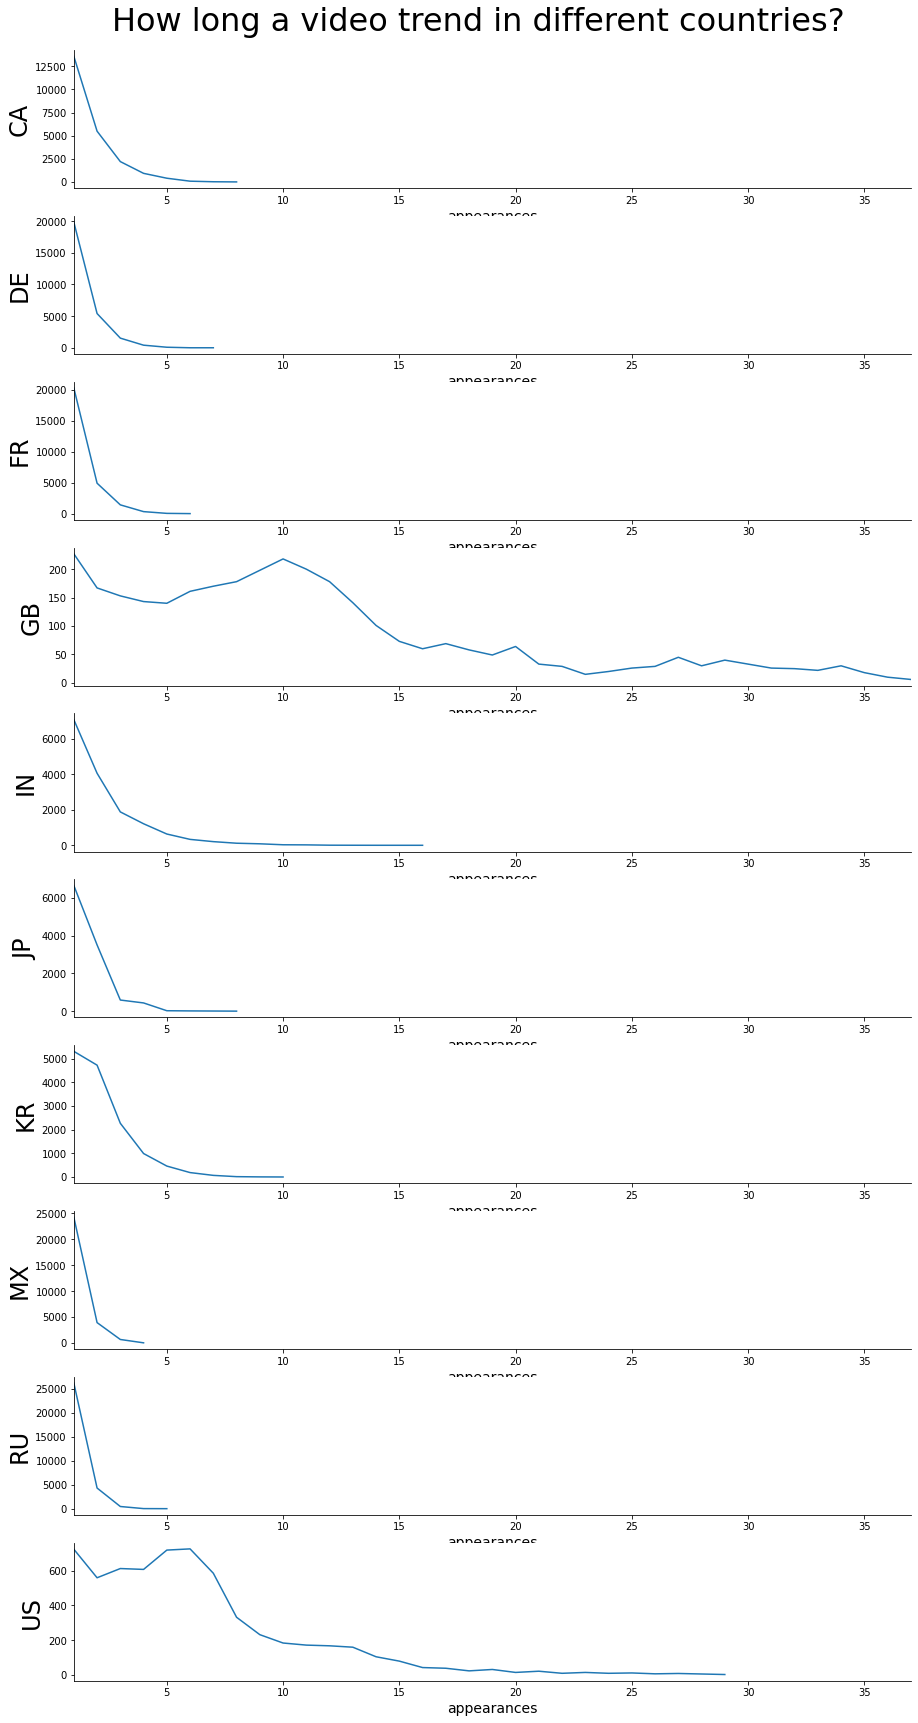

In [35]:
for c in country_list:
    video_list.append(fre_df2[fre_df2['country']==c]['title'].value_counts().sort_index())
    max_list.append(max(fre_df2[fre_df2['country']==c]['title'].value_counts().sort_index().index))

fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9] = plt.subplots(nrows=10,figsize=(15, 30))
st = fig.suptitle("How long a video trend in different countries?", fontsize=32)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(country_list[i],fontsize=24)
    pt.axes.set_xlim(1, max(max_list))

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)

The greater the number, the longer the video is trending. We can see that GB has the greatest number, 37, meaning that the video had been trending for 37 days. Followed by US, India, Korea, Canada, Japan, and Germany. Mexico has the shortest trending days.

#Ratio of Youtube Trending Videos in 5 countries

country
CA    17280
DE    22774
FR    24188
GB     3009
IN    15248
JP    10803
KR    13757
MX    27849
RU    30792
US     5217
Name: title, dtype: int64

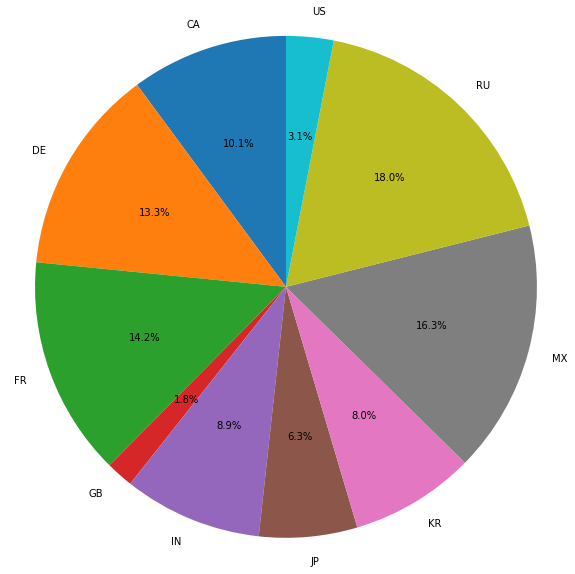

In [36]:
label = df_uniq.groupby(['country']).count().index
size = df_uniq.groupby(['country']).count()['title']

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(size, labels=label, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal') 
size

The countries with the longer trending video have lesser trending video.

#How many likes, dislikes, views and comments get by different countries?

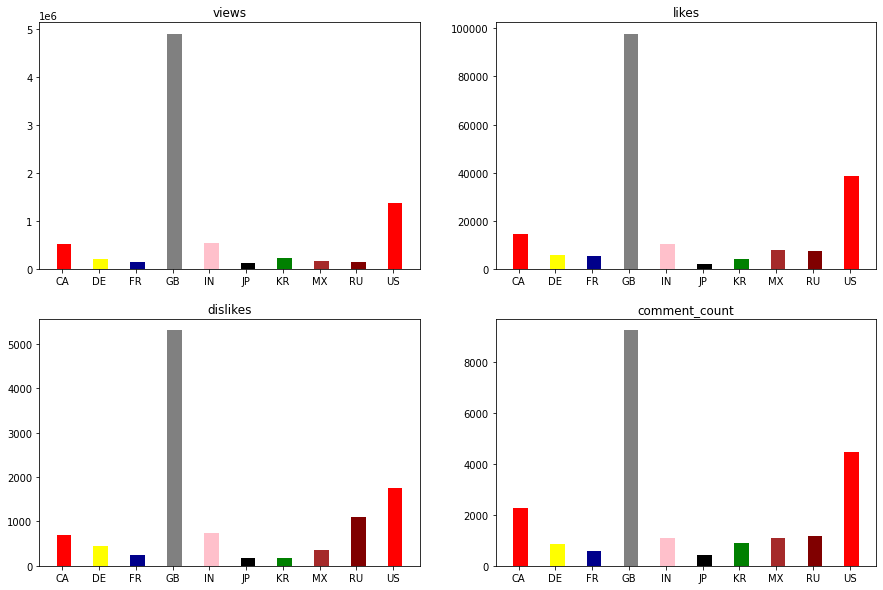

In [37]:
to_int = ['views', 'likes', 'dislikes', 'comment_count']
for column in to_int:
    df_uniq[column] = df_uniq[column].astype(int)
    
measures = list()
n_groups = len(country_list)
for i, typ in enumerate(to_int):
    measure = list()
    for c in country_list:
        measure.append(df_uniq[df_uniq['country']==c][typ].agg('sum')/len(df_uniq[df_uniq['country']==c].index.unique()))
    measures.append(measure)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))

index = np.arange(n_groups)
bar_width = 0.1
opacity = 1
error_config = {'ecolor': '0.3'}

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        ax.bar(index + (bar_width), measures[(i+j)+i], bar_width*4,
                alpha=opacity, color=['r','#FFFF00','#00008B','#808080','#FFC0CB','black','green','#A52A2A', '#800000'],
                error_kw=error_config)
        ax.set_title(to_int[(i+j)+i])
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(country_list)

The more last-long video, the more like, dislike, comment, and view the video gets. We can conclude that those four features have posotive relationship with trending video.

#Correlation of trending video in between countries

In [ ]:
len(fre_df2)

187328

In [ ]:
corr_list = pd.DataFrame(fre_df2['video_id'].unique(), columns=['video_id'])
for country_code in fre_df2['country'].unique():
    corr_list[country_code] = 0
corr_list['total']=0
corr_list=corr_list.set_index('video_id')

#print new_list
for index , item in corr_list.iterrows():
    #print index
    total = 0
    for i ,row in fre_df2[fre_df2['video_id'] == index][['country','title']].iterrows():
        total += row['title']
        corr_list.loc[[index],[row['country']]] = row['title']
    corr_list.loc[[index],['total']] = total
corr_list.head()

,GB,US,IN,KR,JP,CA,DE,FR,RU,MX,total
video_id,,,,,,,,,,,
2z3EUY1aXdY,37,4,0,0,0,6,4,5,1,3,60
tsp7IOr7Q9A,37,0,0,0,0,5,2,2,1,1,48
u_C4onVrr8U,37,17,0,0,0,3,0,1,0,0,58
Il-an3K9pjg,37,0,0,0,0,0,0,0,0,0,37
tGRzz0oqgUE,37,7,0,0,0,5,2,3,0,0,54


#trend video from overall vs each country

Text(0.5, 1.0, 'Catogories of trend videos')

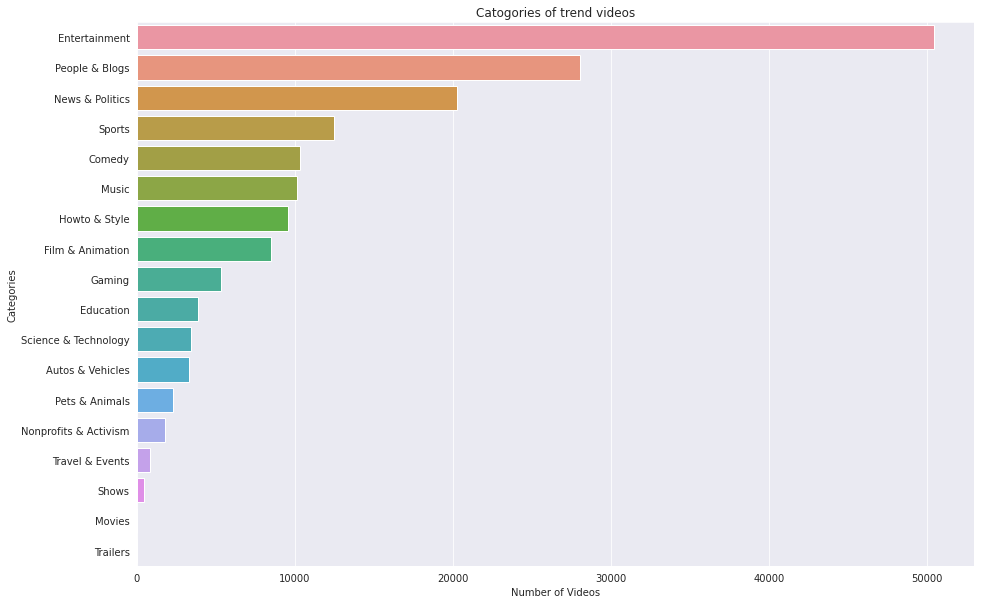

In [ ]:
cat_all = df_uniq['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.barplot(y=cat_all['index'],x=cat_all['category'], data=cat_all,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos")

Text(0.5, 1.0, 'Catogories of trend videos in United Kingdom')

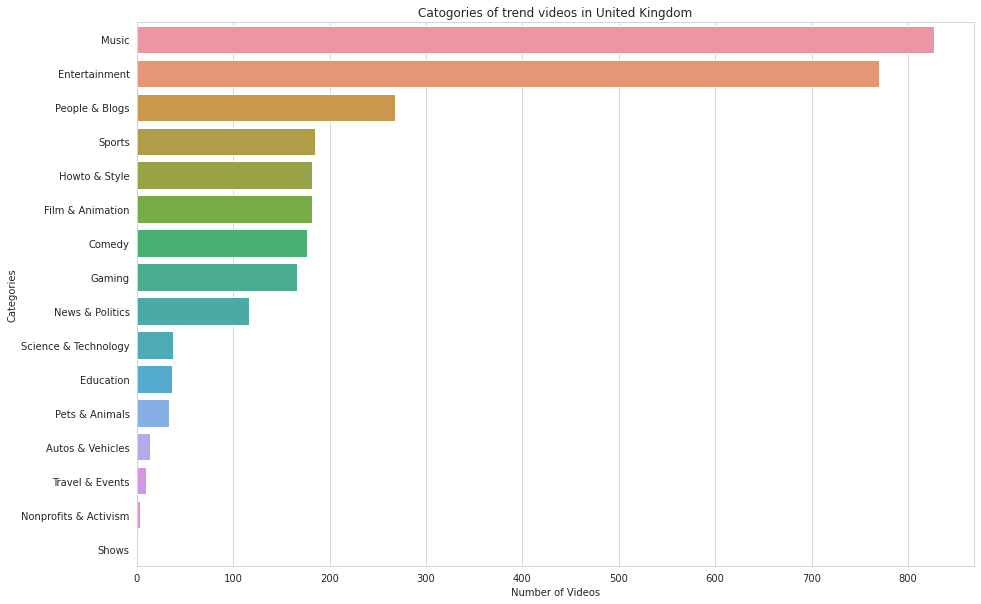

In [ ]:
#UK
cat_df_gb = df_uniq[df_uniq['country']=='GB']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'], data=cat_df_gb,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in United Kingdom")

Text(0.5, 1.0, 'Catogories of trend videos in United States')

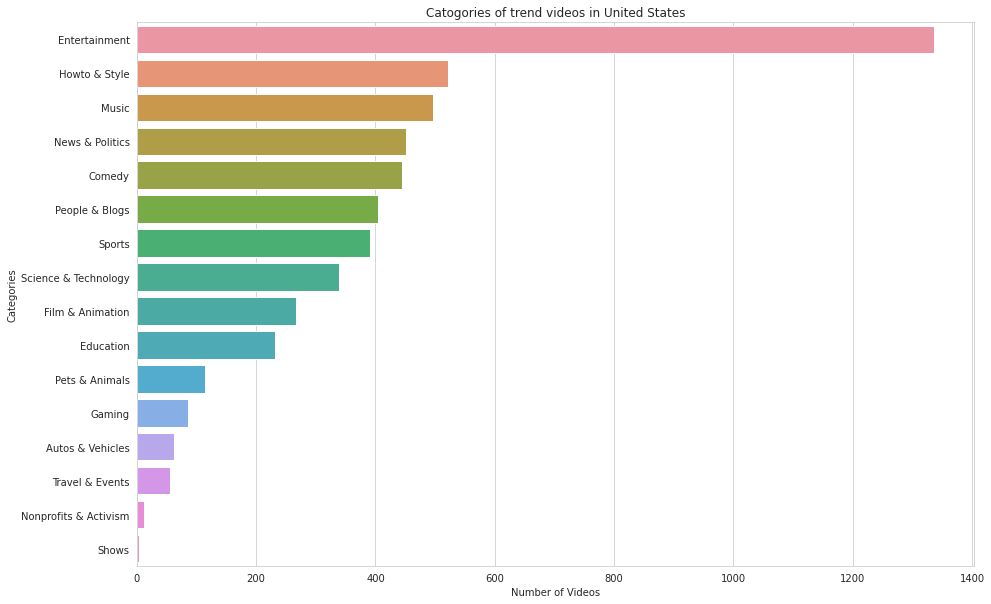

In [ ]:
#US
cat_df_us = df_uniq[df_uniq['country']=='US']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['category'], data=cat_df_us,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in United States")

Text(0.5, 1.0, 'Catogories of trend videos in Canada')

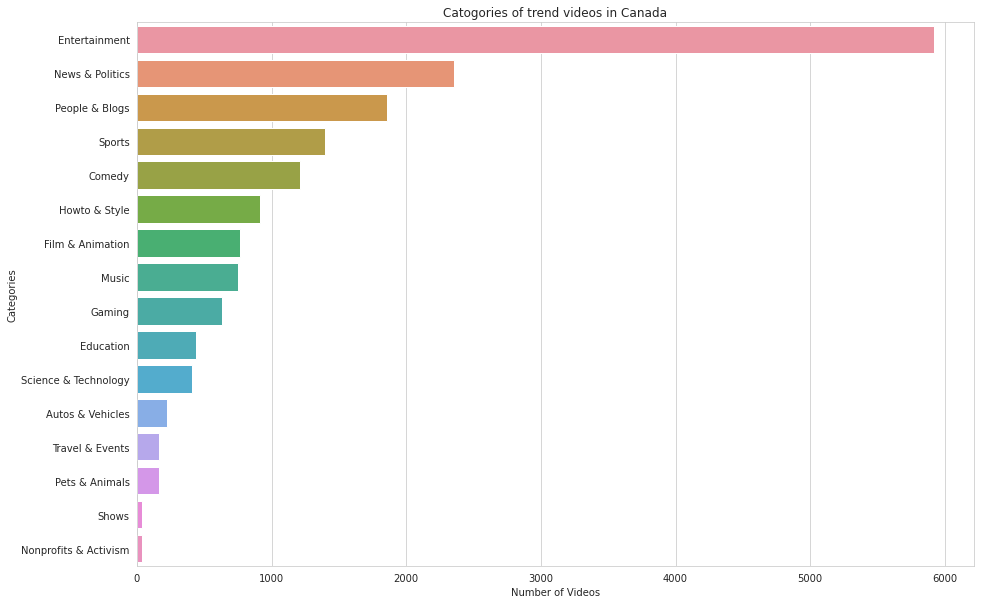

In [ ]:
#Canada
cat_df_ca = df_uniq[df_uniq['country']=='CA']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_ca['index'],x=cat_df_ca['category'], data=cat_df_ca,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Canada")

Text(0.5, 1.0, 'Catogories of trend videos in Germany')

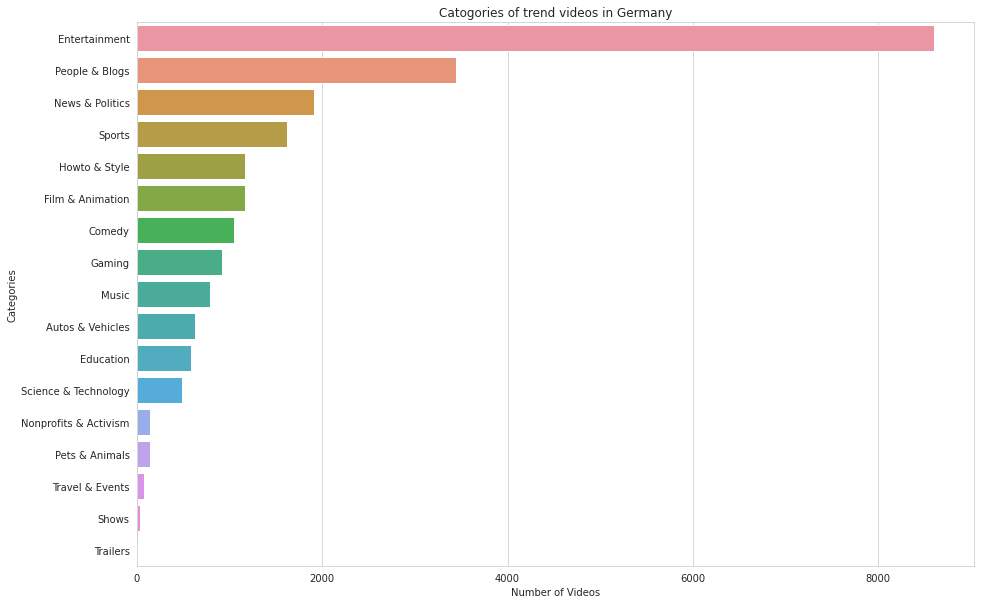

In [ ]:
#Germany
cat_df_de = df_uniq[df_uniq['country']=='DE']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_de['index'],x=cat_df_de['category'], data=cat_df_de,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Germany")

Text(0.5, 1.0, 'Catogories of trend videos in France')

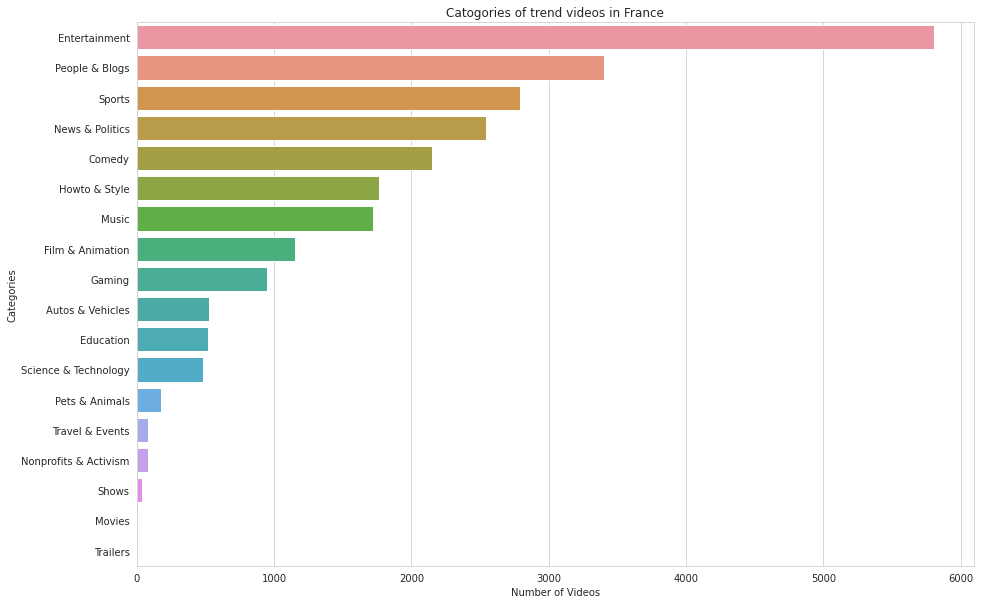

In [ ]:
#France
cat_df_fr = df_uniq[df_uniq['country']=='FR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in France")

Text(0.5, 1.0, 'Catogories of trend videos in India')

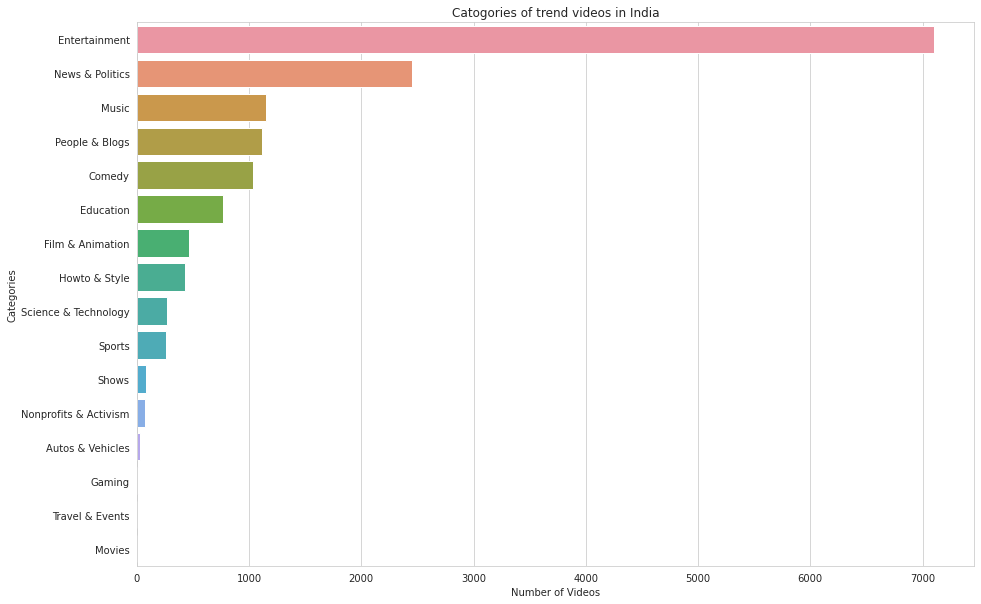

In [ ]:
#India
cat_df_in = df_uniq[df_uniq['country']=='IN']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_in['index'],x=cat_df_in['category'], data=cat_df_in,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in India")

Text(0.5, 1.0, 'Catogories of trend videos in Japan')

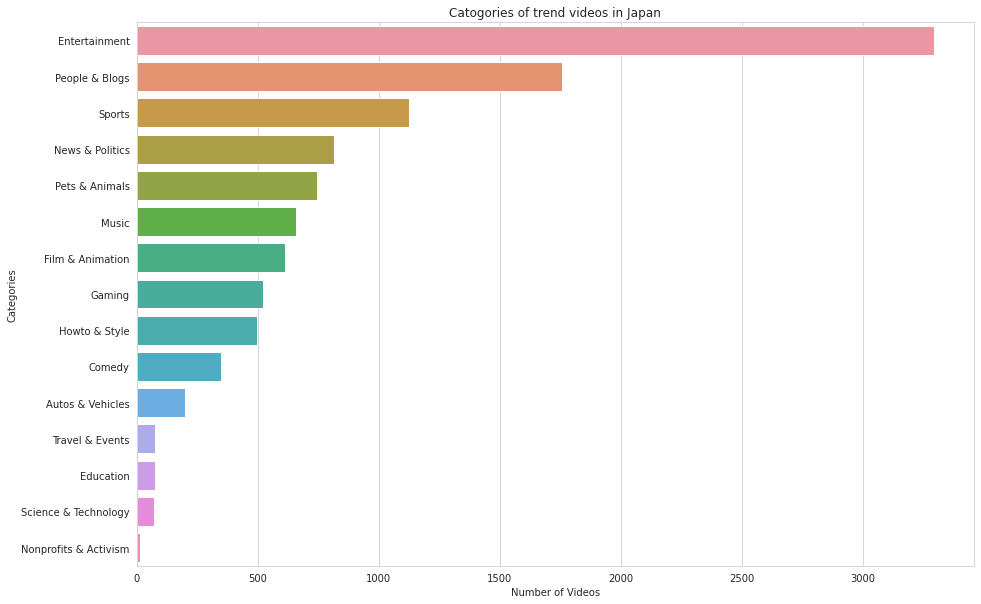

In [ ]:
#Japna
cat_df_jp = df_uniq[df_uniq['country']=='JP']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_jp['index'],x=cat_df_jp['category'], data=cat_df_jp,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Japan")

Text(0.5, 1.0, 'Catogories of trend videos in Korea')

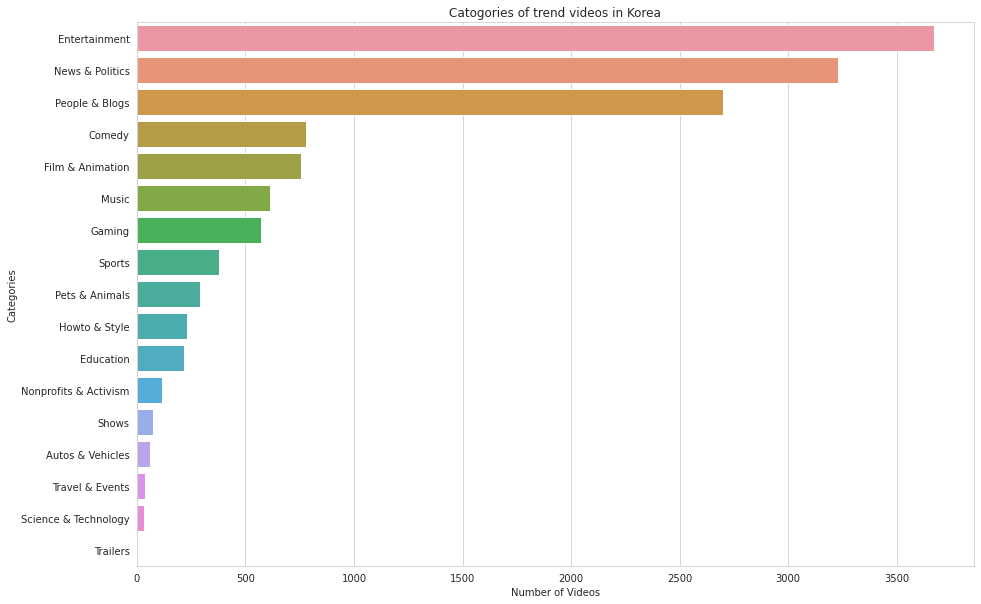

In [ ]:
#Korea
cat_df_kr = df_uniq[df_uniq['country']=='KR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_kr['index'],x=cat_df_kr['category'], data=cat_df_kr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Korea")

Text(0.5, 1.0, 'Catogories of trend videos in Mexico')

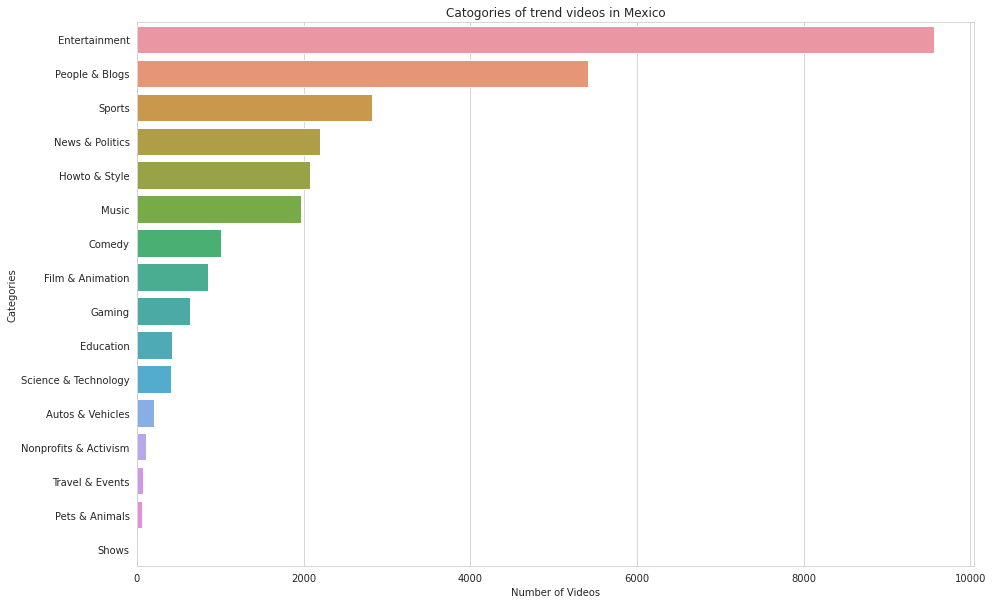

In [ ]:
#Mexico
cat_df_mx = df_uniq[df_uniq['country']=='MX']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_mx['index'],x=cat_df_mx['category'], data=cat_df_mx,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Mexico")

Text(0.5, 1.0, 'Catogories of trend videos in Russia')

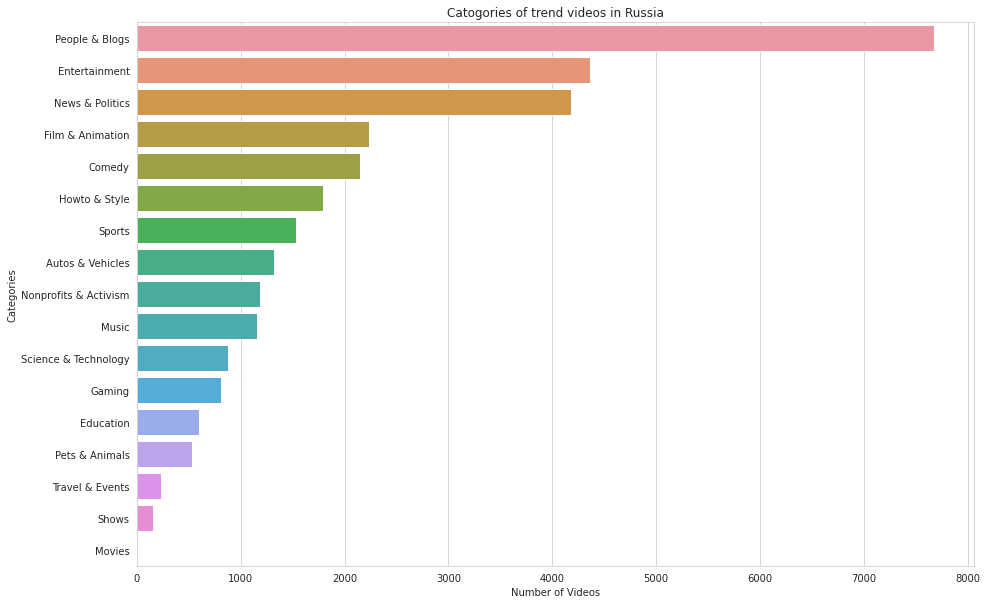

In [ ]:
#Russia
cat_df_ru = df_uniq[df_uniq['country']=='RU']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_ru['index'],x=cat_df_ru['category'], data=cat_df_ru,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Russia")


Overall:
1.   Entertainment
2.   People & blog
3.   News & Politics
4.   Sports
5.   Comedy
6.   Music


UK:
1.   Music
2.   Entertainment
3.   People & blog
4.   Sports
5.   Howto & Style
6.   Music



US:
1. Entertainment
2. Howto & Style
3. Music
4. News & Politics
5. Comedy

CA:
1. Entertainment
2. News & Politics
3. People & blog
4. Sports
5. Comedy

Germany:
1. Ent
2. P&B
3. News
4. Sports
5. Howto

FR:
1. Ent
2. P&B
3. Sports
4. News
5. Comedy

India:
1. Ent
2. News
3. Music
4. P&B
5. Comedy

JP:
1. Ent
2. P&B
3. Sports
4. News
5. Pets

Korea:
1. Ent
2. News
3. P&B
4. Comedy
5. Film

Mexico:
1. Ent
2. P&B
3. Sports
4. News
5. Howto

Russia:
1. P&B
2. Ent
3. News
4. Film
5. Comedy


1.   In our whole dataset, the top category is Entertainment. Followed by People & Blog, News & Politics, Sports, Comedy, and Music.
2.   Entertainment is in every country's top 5 category
3.   Howto & Style is the second popular category in the US, this might because that most of the people in the US DIY a lot.
4. People & Blog is the top category in Russia.
